Importing Libraries

In [4]:
import pandas as pd # for data manipulation and analysis
import numpy as np # linear algebra

# For visualization 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style("whitegrid")

# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# Generating random values
import random as rd 

# For regex search
import re

#Importing libraries ML models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

#Importing dataset splitting library
from sklearn.model_selection import train_test_split

#Import Joblib
import joblib

#Encoders
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

#SMOTE
from imblearn.over_sampling import SMOTE

Exploratory Data analysis

In [5]:
#Read Dataset file 
df = pd.read_csv('Dataset/Point_variant_factorIX.csv')

In [6]:
df.sample(10)

,Variant ID,Case ID,Type,Effect,c.DNA,HGVS/Amino acid,Legacy/Amino Acid,Domain,Location in gene,Variant,Protein Change,FIX:C %,FIX:Ag %,Type I/II,Inhibitors,Severity,Comments,Reference,Reporting Centre
1864,353,1277,Point,Missense,677.0,226.0,180.0,Act-Peptide,Exon 6,c.677G>A,p.(Arg226Gln),-,-,-,NaN,NaN,-,Wulff et al (1995),Germany
2004,1023,3352,Point,Splice,723.0,NaN,NaN,-,Intron 6,c.723+2T>C,NaN,<1,-,-,NaN,Severe,-,Costa et al (2000),France
3682,682,4445,Point,Missense,1219.0,407.0,361.0,Serine Protease,Exon 8,c.1219T>G,p.(Cys407Gly),<1,NaN,NaN,NO,Severe,NaN,Johnsen et al (2017),United States
197,1085,3193,Point,Splice,88.0,NaN,NaN,-,Intron 1,c.88+5G>C,NaN,11,-,-,NaN,Mild,-,Centre B30 (unpublished),NaN
2768,535,1956,Point,Missense,1010.0,337.0,291.0,Serine Protease,Exon 8,c.1010C>T,p.(Ala337Val),9,-,-,NaN,Mild,-,Weinmann et al (1998),United States
1043,196,714,Point,Missense,316.0,106.0,60.0,EGF1,Exon 4,c.316G>A,p.(Gly106Ser),-,-,-,NaN,Mild,-,Belvini et al (2005),Italy
3939,762,2755,Point,Missense,1307.0,436.0,390.0,Serine Protease,Exon 8,c.1307C>T,p.(Ala436Val),<1,-,-,NaN,Severe,-,Drost et al (2000),China
787,152,560,Point,Missense,262.0,88.0,42.0,Gla,Exon 3,c.262T>C,p.(Trp88Arg),<1,-,-,NaN,Severe,-,Mahajan et al (2007),India
42,8,14,Point,NaN,-49.0,NaN,NaN,-,UTR 5',c.-49T>A,NaN,0 to 36,0 to 36,-,NaN,Mild,-,Centre B23 (unpublished),NaN
509,107,384,Point,Nonsense,184.0,62.0,16.0,Gla,Exon 2,c.184A>T,p.(Arg62*),<1,-,-,NaN,Severe,-,Niceta et al (2006),Italy


In [7]:
df.shape

(4151, 19)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4151 entries, 0 to 4150
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Variant ID         4151 non-null   int64  
 1   Case ID            4151 non-null   int64  
 2   Type               4151 non-null   object 
 3   Effect             4021 non-null   object 
 4   c.DNA              4123 non-null   float64
 5   HGVS/Amino acid    3779 non-null   float64
 6   Legacy/Amino Acid  3779 non-null   float64
 7   Domain             4107 non-null   object 
 8   Location in gene   4151 non-null   object 
 9   Variant            4151 non-null   object 
 10  Protein Change     3779 non-null   object 
 11  FIX:C %            4126 non-null   object 
 12  FIX:Ag %           3184 non-null   object 
 13  Type I/II          3177 non-null   object 
 14  Inhibitors         1128 non-null   object 
 15  Severity           3628 non-null   object 
 16  Comments           3168 

In [9]:
df.describe(include='all')

,Variant ID,Case ID,Type,Effect,c.DNA,HGVS/Amino acid,Legacy/Amino Acid,Domain,Location in gene,Variant,Protein Change,FIX:C %,FIX:Ag %,Type I/II,Inhibitors,Severity,Comments,Reference,Reporting Centre
count,4151.000000,4151.000000,4151,4021,4123.000000,3779.000000,3779.000000,4107,4151,4151,3779,4126,3184,3177,1128,3628,3168,4151,3093
unique,NaN,NaN,1,4,NaN,NaN,NaN,10,19,884,726,172,161,3,2,5,17,232,27
top,NaN,NaN,Point,Missense,NaN,NaN,NaN,Serine Protease,Exon 8,c.1025C>T,p.(Thr342Met),<1,-,-,NO,Severe,-,Johnsen et al (2017),United States
freq,NaN,NaN,4151,3141,NaN,NaN,NaN,2221,1884,322,322,1402,2278,2522,1084,1600,3116,926,1481
mean,539.451457,2348.372199,NaN,NaN,716.831433,252.781424,206.710241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3420.359875,1412.336282,NaN,NaN,402.430668,129.241618,129.359652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,-822.000000,3.000000,-44.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,252.500000,1125.500000,NaN,NaN,316.000000,128.000000,82.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,469.000000,2249.000000,NaN,NaN,781.000000,279.000000,233.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,649.000000,3681.500000,NaN,NaN,1042.500000,357.000000,311.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


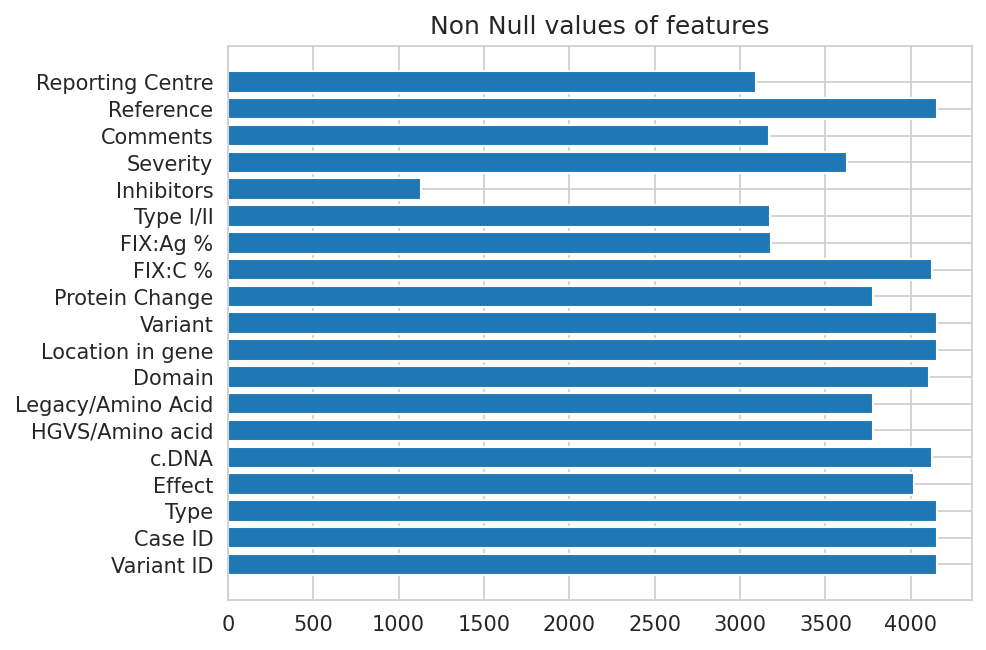

In [10]:
#Plot non-null values of each features using Horizontal Barplot
features, count = list(df.columns), list(df.notnull().sum())
plt.figure(dpi=150)
plt.barh(y=features, width=count)
plt.title("Non Null values of features")
plt.show()

Data Preprocessing

In [11]:
# Change all values to lowercase
df = df.applymap(lambda s : s.lower() if type(s) == str else s)

In [12]:
# Remove all the irrevalent columns
new_df = df.drop(columns=[i[0] for i in zip(df.columns, range(len(df))) if i[1] not in [3, 7, 8, 9, 10, 11, 12, 15]])

# Drop rows with null values
new_df = new_df.dropna()

In [13]:
# Drop ambiguious severity values
new_df = new_df[new_df.Severity.isin(['-']) == False]

In [14]:
# Drop "-" values from FIX:C% and FIX:Ag% 
new_df = new_df[(new_df['FIX:Ag %'] != '-') & (new_df['FIX:C %'] != '-')]

In [15]:
# Drop duplicate values
new_df = new_df.drop_duplicates()

In [16]:
#Correct values in FIX:C%
# max(FIX:C%) = 100%
# min(FIX:C%) = 0%
for index, row in new_df.iterrows(): #iternating over rows
    less_match = re.search(r'(?<=<)\d*\.*\d*', row['FIX:C %']) # searching for <100/<.34/<2.34 type values
    to_match = re.search(r'(\d*\.*\d*)\s*(to|-)\s*(\d*\.*\d*)', row['FIX:C %']) # searching for 10 to 5/10to14/10-15 type values 
    if less_match:
        new_df.at[index, 'FIX:C %'] = float(less_match[0])*rd.random() # converting to floating value in the range(0,less_match[0])
    if to_match:
        new_df.at[index, 'FIX:C %'] = rd.uniform(float(to_match[1]), float(to_match[3])) # converting to floating value in the range(less_match[0],less_match[1])


#Correct values in FIX:Ag%
# max(FIX:Ag%) = 200%
# min(FIX:Ag%) = 0%
for index, row in new_df.iterrows(): #iternating over rows
    less_match = re.search(r'(?<=<)\d*\.*\d*', row['FIX:Ag %']) # searching for <100/<.34/<2.34 type values
    to_match = re.search(r'(\d*\.*\d*)\s*(to|-)\s*(\d*\.*\d*)', row['FIX:Ag %']) # searching for 10 to 5/10to14/10-15 type values 
    grt_match = re.search(r'(?<=>)\d*\.*\d*', row['FIX:Ag %']) # Searcing for >100 values
    if less_match:
        new_df.at[index, 'FIX:Ag %'] = float(less_match[0])*rd.random() 
    if to_match:
        new_df.at[index, 'FIX:Ag %'] = rd.uniform(float(to_match[1]), float(to_match[3])) 
    if grt_match:
        new_df.at[index, 'FIX:Ag %'] = rd.uniform(float(grt_match[0]), 200) # converting to floating value in range(grt_match[0], 200)

In [17]:
# Convert values in FIX:C % and FIX:Ag % to float
new_df['FIX:C %'] = new_df['FIX:C %'].astype(float)
new_df['FIX:Ag %'] = new_df['FIX:Ag %'].astype(float)

In [18]:
#Write unique values and their count of each feature to a file
with open('unique_val_count.txt', 'w') as f:
    for col in new_df.columns:
        f.write(col+'\n')
        for i in zip(list(new_df[col].value_counts().index), list(new_df[col].value_counts().values)):
            f.write(str(i))
            f.write("\n")
        f.write("\n")
f.close()

In [19]:
#Separate "Variant" into 3 columns

#Initializing lists
act_nucleo = [] 
mut_nucleo = []
nucleo_pos = []

for index, row in new_df.iterrows(): # iterating over rows
    match = re.search(r'(\d+)(\w)>{1}(\w)', row['Variant']) # regex to extract actual, mutated nucleotide and mutation position
    if match:
        nucleo_pos.append(match[1]) # group 1: mutation position of nucleotide
        act_nucleo.append(match[2]) # group 2: actual nucleotide
        mut_nucleo.append(match[3]) # group 3: mutated nucleotide

# dropping existing Variant column
new_df = new_df.drop('Variant', axis=1) 

#Adding new Variant columns with its values
new_df['act_nucleo'] = act_nucleo 
new_df['nucleo_pos'] = nucleo_pos
new_df['mut_nucleo'] = mut_nucleo


In [20]:
#Separate "Protein change" into 3 columns
#Initializing lists
act_amino = [] 
mut_amino = []
amino_pos = []

for index, row in new_df.iterrows(): # iterating over rows
    match = re.search(r'([a-z]+)(\d+)([a-z]+|\*)', row['Protein Change']) # regex to extract actual, mutated nucleotide and mutation position
    if match:
        act_amino.append(match[1]) # group 1: mutation position of amino acid
        amino_pos.append(match[2]) # group 2: actual amino acid
        # group 3: mutated amino acide
        if match[3] == "*":
            mut_amino.append("stp_cdn")    
        else:
            mut_amino.append(match[3])  

# dropping existing Variant column
new_df = new_df.drop('Protein Change', axis=1) 

#Adding new Variant columns with its values
new_df['act_amino'] = act_amino 
new_df['amino_pos'] = amino_pos
new_df['mut_amino'] = mut_amino

In [21]:
# Move severity column to end
cols = list(new_df.columns)
cols.insert(len(cols), cols.pop(cols.index('Severity')))
new_df = new_df.loc[:, cols]

In [22]:
#Converting to int
cols = ['nucleo_pos', 'amino_pos']
for i in cols:
    new_df[i] = new_df[i].astype(int)

In [23]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 708 entries, 130 to 4149
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Effect            708 non-null    object 
 1   Domain            708 non-null    object 
 2   Location in gene  708 non-null    object 
 3   FIX:C %           708 non-null    float64
 4   FIX:Ag %          708 non-null    float64
 5   act_nucleo        708 non-null    object 
 6   nucleo_pos        708 non-null    int64  
 7   mut_nucleo        708 non-null    object 
 8   act_amino         708 non-null    object 
 9   amino_pos         708 non-null    int64  
 10  mut_amino         708 non-null    object 
 11  Severity          708 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 88.1+ KB


<Axes: xlabel='Effect', ylabel='count'>

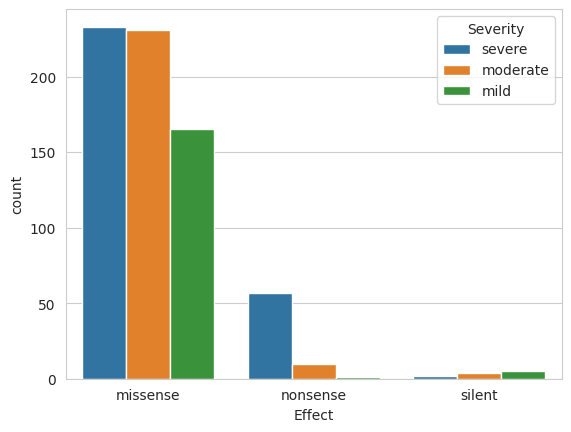

In [24]:
sns.countplot(data=new_df, x='Effect', hue='Severity')

<Axes: xlabel='Domain', ylabel='count'>

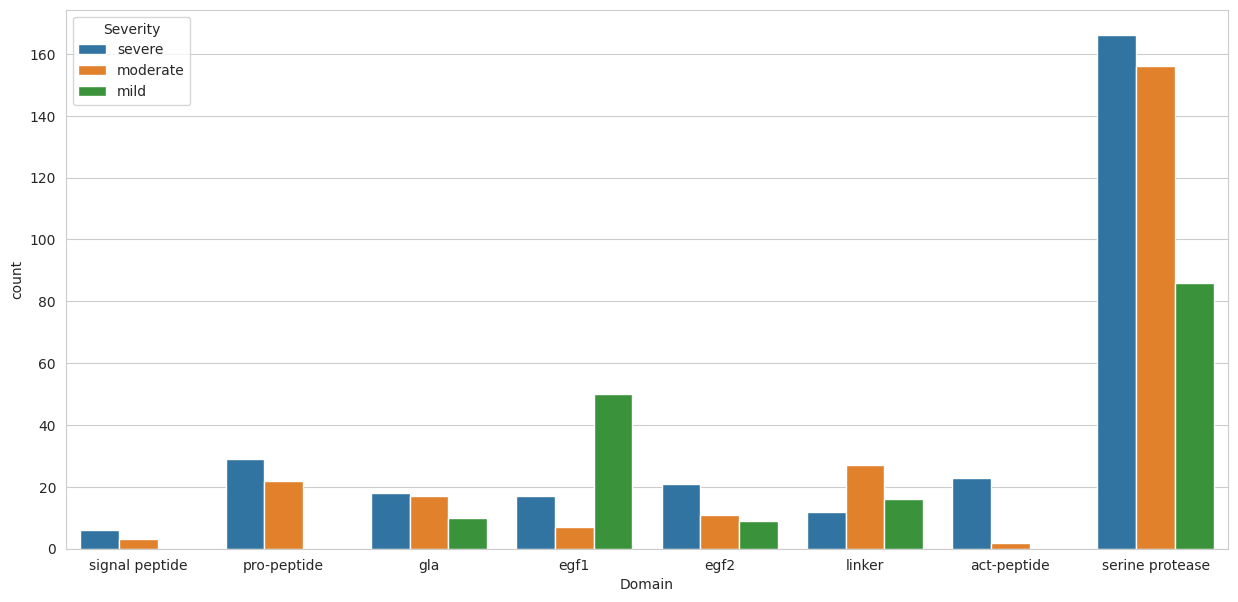

In [25]:
plt.figure(figsize=(15,7))
sns.countplot(data=new_df, x='Domain', hue='Severity')

<Axes: xlabel='Location in gene', ylabel='count'>

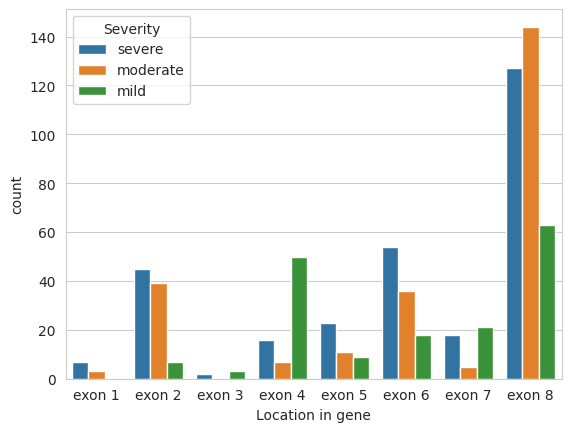

In [26]:
sns.countplot(data=new_df, x='Location in gene', hue='Severity')

In [27]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 708 entries, 130 to 4149
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Effect            708 non-null    object 
 1   Domain            708 non-null    object 
 2   Location in gene  708 non-null    object 
 3   FIX:C %           708 non-null    float64
 4   FIX:Ag %          708 non-null    float64
 5   act_nucleo        708 non-null    object 
 6   nucleo_pos        708 non-null    int64  
 7   mut_nucleo        708 non-null    object 
 8   act_amino         708 non-null    object 
 9   amino_pos         708 non-null    int64  
 10  mut_amino         708 non-null    object 
 11  Severity          708 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 88.1+ KB


<Axes: xlabel='Severity', ylabel='count'>

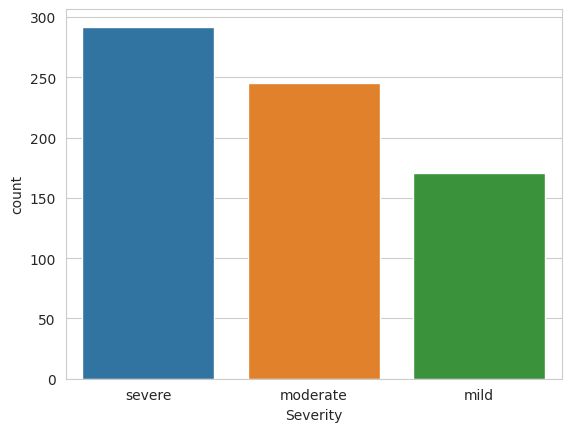

In [28]:
sns.countplot(data=new_df, x='Severity')

<Axes: xlabel='mut_nucleo', ylabel='count'>

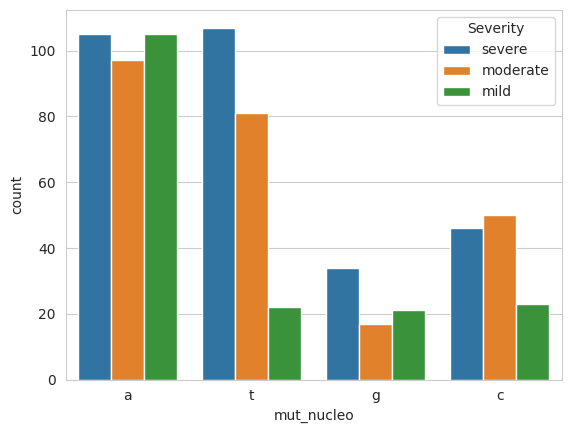

In [29]:
sns.countplot(data=new_df, x='mut_nucleo', hue='Severity')

<Axes: xlabel='mut_amino', ylabel='count'>

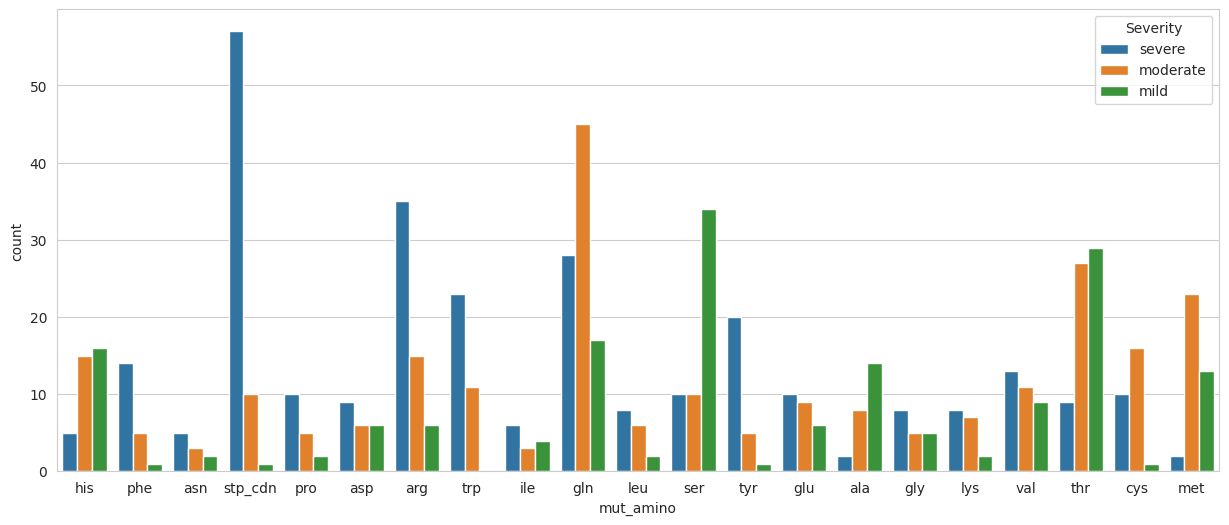

In [30]:
plt.figure(figsize=(15,6))
sns.countplot(data=new_df, x='mut_amino', hue='Severity')

Data Visualization

<Figure size 1000x1000 with 0 Axes>

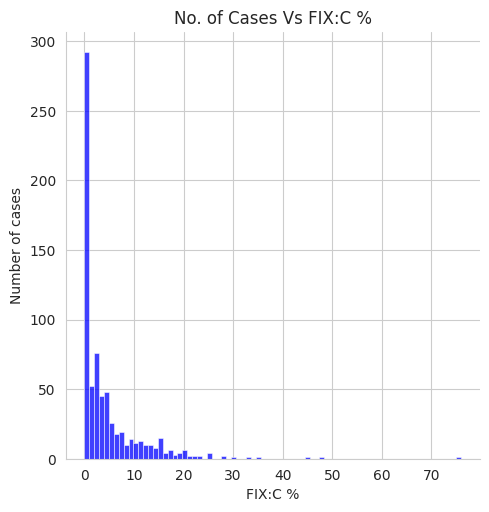

In [31]:
#No.of cases vs FIX: C% 
plt.figure(figsize=(10, 10))
sns.displot(new_df['FIX:C %'], color='b')
plt.title('No. of Cases Vs FIX:C %')
plt.ylabel('Number of cases')
plt.show()

<Figure size 1000x1000 with 0 Axes>

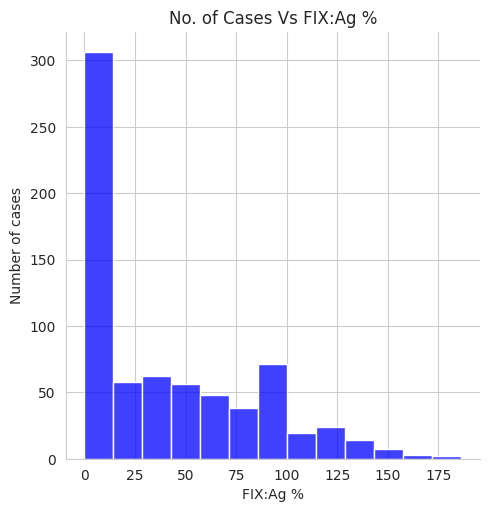

In [32]:
#No.of cases vs FIX: Ag% 
plt.figure(figsize=(10, 10))
sns.displot(new_df['FIX:Ag %'], color='b')
plt.title('No. of Cases Vs FIX:Ag %')
plt.ylabel('Number of cases')
plt.show()

In [33]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 708 entries, 130 to 4149
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Effect            708 non-null    object 
 1   Domain            708 non-null    object 
 2   Location in gene  708 non-null    object 
 3   FIX:C %           708 non-null    float64
 4   FIX:Ag %          708 non-null    float64
 5   act_nucleo        708 non-null    object 
 6   nucleo_pos        708 non-null    int64  
 7   mut_nucleo        708 non-null    object 
 8   act_amino         708 non-null    object 
 9   amino_pos         708 non-null    int64  
 10  mut_amino         708 non-null    object 
 11  Severity          708 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 88.1+ KB


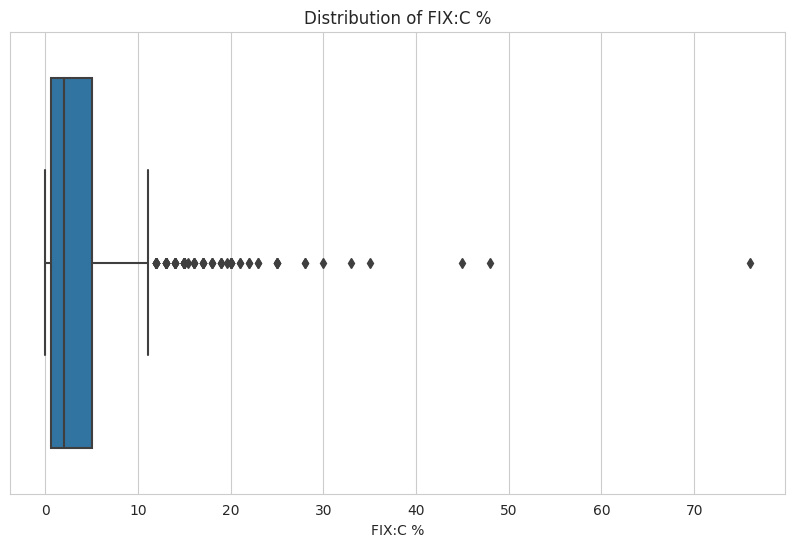

In [34]:
plt.figure(figsize=(10,6))
sns.boxplot(x=new_df['FIX:C %'])
plt.title('Distribution of FIX:C %')
plt.show()

In [35]:
Q1 = new_df['FIX:C %'].quantile(0.25)
Q3 = new_df['FIX:C %'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

4.421001625974967


In [36]:
new_df[(new_df['FIX:C %'] < Q1 - 1.5*IQR) | (new_df['FIX:C %'] > Q3 + 1.5*IQR)]

,Effect,Domain,Location in gene,FIX:C %,FIX:Ag %,act_nucleo,nucleo_pos,mut_nucleo,act_amino,amino_pos,mut_amino,Severity
472,missense,gla,exon 2,15.0,68.0,t,163,a,phe,55,ile,mild
483,missense,gla,exon 2,14.0,118.0,t,163,a,phe,55,ile,mild
494,missense,gla,exon 2,13.0,44.0,g,172,a,gly,58,arg,mild
704,missense,gla,exon 2,20.0,70.0,g,224,a,arg,75,gln,mild
706,missense,gla,exon 2,18.0,51.0,g,224,a,arg,75,gln,mild
...,...,...,...,...,...,...,...,...,...,...,...,...
4106,missense,serine protease,exon 8,25.0,132.0,g,1346,a,arg,449,gln,mild
4108,missense,serine protease,exon 8,33.0,101.0,g,1346,a,arg,449,gln,mild
4109,missense,serine protease,exon 8,30.0,60.0,g,1346,a,arg,449,gln,mild
4111,missense,serine protease,exon 8,48.0,185.0,g,1346,a,arg,449,gln,mild


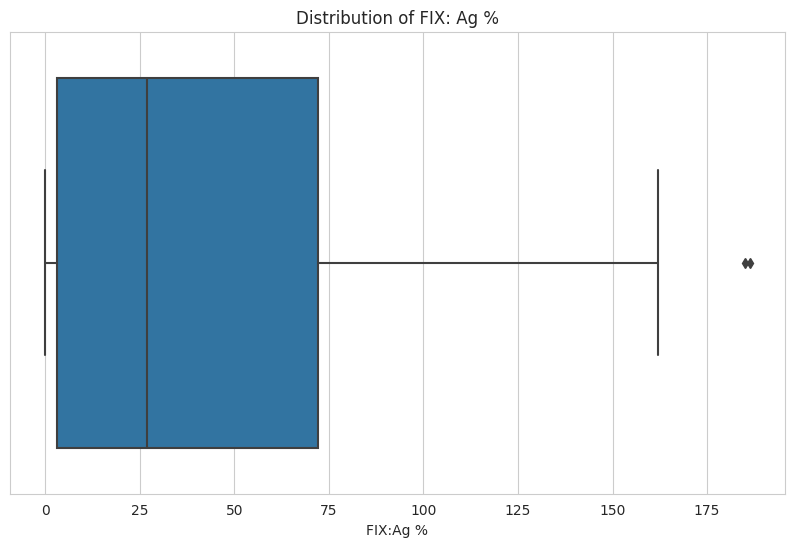

In [37]:
plt.figure(figsize=(10,6))
sns.boxplot(x=new_df['FIX:Ag %'])
plt.title('Distribution of FIX: Ag %')
plt.show()

In [38]:
Q1 = new_df['FIX:Ag %'].quantile(.25)
Q3 = new_df['FIX:Ag %'].quantile(.75)
IQR = Q3 - Q1

In [39]:
new_df[(new_df['FIX:Ag %'] < Q1 - 1.5*IQR) | (new_df['FIX:Ag %'] > Q3 + 1.5*IQR)]

,Effect,Domain,Location in gene,FIX:C %,FIX:Ag %,act_nucleo,nucleo_pos,mut_nucleo,act_amino,amino_pos,mut_amino,Severity
3763,missense,serine protease,exon 8,7.0,186.286531,c,1240,a,pro,414,thr,mild
4111,missense,serine protease,exon 8,48.0,185.000000,g,1346,a,arg,449,gln,mild


In [40]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 708 entries, 130 to 4149
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Effect            708 non-null    object 
 1   Domain            708 non-null    object 
 2   Location in gene  708 non-null    object 
 3   FIX:C %           708 non-null    float64
 4   FIX:Ag %          708 non-null    float64
 5   act_nucleo        708 non-null    object 
 6   nucleo_pos        708 non-null    int64  
 7   mut_nucleo        708 non-null    object 
 8   act_amino         708 non-null    object 
 9   amino_pos         708 non-null    int64  
 10  mut_amino         708 non-null    object 
 11  Severity          708 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 88.1+ KB


In [41]:
n_df = new_df.iloc[:, :-1]
t_df = new_df.iloc[:, -1]

In [42]:


# Label Encode severity
lb = LabelEncoder()
t_df = lb.fit_transform(t_df)

# Feature transformation
categorial_cols = [i for i in n_df.columns if n_df.dtypes[i] in ['O']]
numerical_cols = [i for i in n_df.columns if n_df.dtypes[i] in ['float64', 'int64']]

feature_cols = categorial_cols + numerical_cols

transformer = [
    ('encode', OrdinalEncoder(), categorial_cols),
    ('scale', StandardScaler(), numerical_cols)
]

colTrans = ColumnTransformer(transformer, remainder='passthrough')
n_df_raw = colTrans.fit_transform(n_df)

n_df = pd.DataFrame(
    n_df_raw, columns=colTrans.get_feature_names_out())


In [43]:
# Adding severity
n_df['Severity'] = t_df

<Axes: >

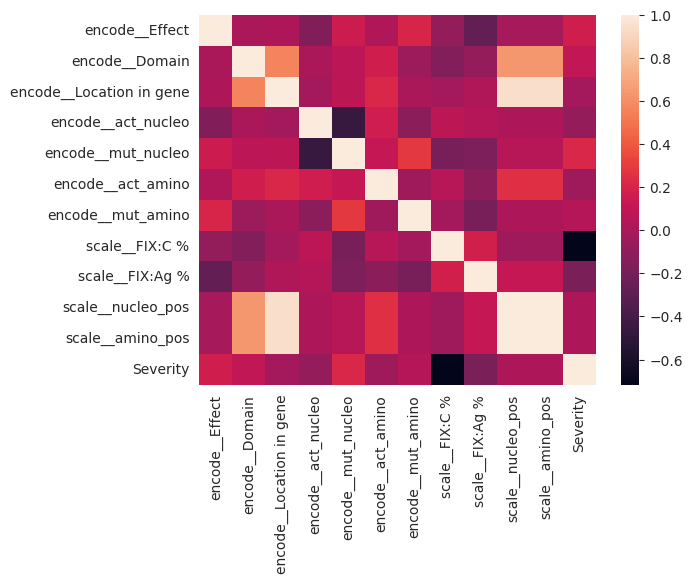

In [44]:
sns.heatmap(n_df.corr())

Model Training

In [45]:
# Split data into target and features
x = n_df.iloc[:, :-1]
y = n_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=42)

# correcting imbalance dataset
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [46]:
#object creation
nb_classifier = GNB()
log_reg = LogisticRegression(random_state=42)
rf = RandomForestClassifier(n_estimators=100)
gb = GradientBoostingClassifier(random_state=42)

In [47]:
#Training
log_reg.fit(X_train, y_train)
nb_classifier.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [48]:
# Calculate the accuracy
acc_log = accuracy_score(y_test, log_reg.predict(X_test))
acc_nb = accuracy_score(y_test, nb_classifier.predict(X_test))
acc_rf = accuracy_score(y_test, rf.predict(X_test))
acc_gb = accuracy_score(y_test, gb.predict(X_test))

print(f"Logistic regression: {acc_log}")
print(f"Naive Bayes: {acc_nb}")
print(f"Random Forest: {acc_rf}")
print(f"Gradient boosting: {acc_gb}")

Logistic regression: 0.8870056497175142
Naive Bayes: 0.903954802259887
Random Forest: 0.9943502824858758
Gradient boosting: 1.0


Text(0.5, 0, 'ML models')

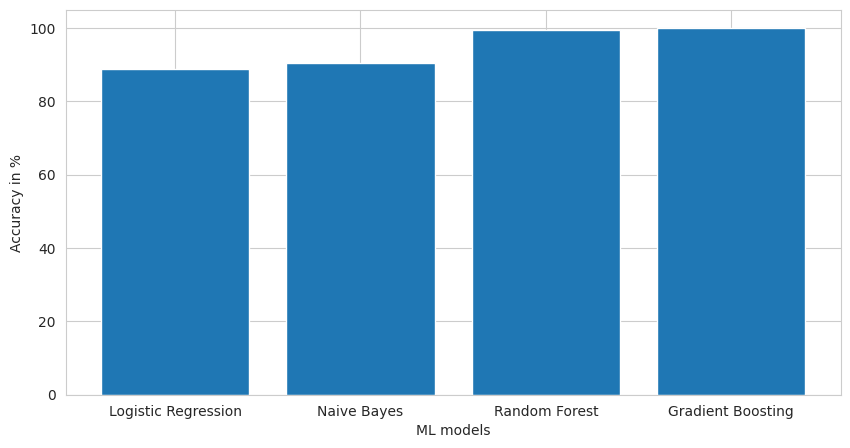

In [49]:
#Accuracy 
accuracies = [i * 100 for i in [acc_log, acc_nb,acc_rf, acc_gb] ]
alg = ["Logistic Regression", "Naive Bayes", "Random Forest", "Gradient Boosting"]

fig = plt.figure(figsize=(10,5))

plt.bar(x=alg, height=accuracies) 
plt.ylabel('Accuracy in %')
plt.xlabel("ML models")

In [67]:
target_name = list(lb.classes_)

In [81]:
#Classification Report
print("Logistic Regression")
print(classification_report(y_test, log_reg.predict(X_test), target_names=target_name))
print("Naive Bayes")
print(classification_report(y_test, nb_classifier.predict(X_test), target_names=target_name))

Logistic Regression
              precision    recall  f1-score   support

        mild       0.98      0.98      0.98        41
    moderate       0.91      0.77      0.83        64
      severe       0.83      0.94      0.88        72

    accuracy                           0.89       177
   macro avg       0.90      0.90      0.90       177
weighted avg       0.89      0.89      0.89       177

Naive Bayes
              precision    recall  f1-score   support

        mild       0.89      1.00      0.94        41
    moderate       0.94      0.78      0.85        64
      severe       0.88      0.96      0.92        72

    accuracy                           0.90       177
   macro avg       0.91      0.91      0.91       177
weighted avg       0.91      0.90      0.90       177



In [80]:
print("Random Forest")
print(classification_report(y_test, rf.predict(X_test), target_names=target_name))

Random Forest
              precision    recall  f1-score   support

        mild       1.00      1.00      1.00        41
    moderate       0.98      1.00      0.99        64
      severe       1.00      0.99      0.99        72

    accuracy                           0.99       177
   macro avg       0.99      1.00      1.00       177
weighted avg       0.99      0.99      0.99       177



In [78]:
print("Gradient Boosting")
print(classification_report(y_test, gb.predict(X_test), target_names=target_name))

Gradient Boosting
              precision    recall  f1-score   support

        mild       1.00      1.00      1.00        41
    moderate       1.00      1.00      1.00        64
      severe       1.00      1.00      1.00        72

    accuracy                           1.00       177
   macro avg       1.00      1.00      1.00       177
weighted avg       1.00      1.00      1.00       177



In [52]:
#confusion matrix for all ml models 
print(f"Confusion Matrix for log_reg: \n{confusion_matrix(y_test, log_reg.predict(X_test))}")
print(f"Confusion Matrix for nb_classifier: \n{confusion_matrix(y_test, nb_classifier.predict(X_test))}")
print(f"Confusion Matrix for random forest: \n{confusion_matrix(y_test, rf.predict(X_test))}")
print(f"Confusion Matrix for gradient boosting: \n{confusion_matrix(y_test, gb.predict(X_test))}")

Confusion Matrix for log_reg: 
[[40  1  0]
 [ 1 49 14]
 [ 0  4 68]]
Confusion Matrix for nb_classifier: 
[[41  0  0]
 [ 5 50  9]
 [ 0  3 69]]
Confusion Matrix for random forest: 
[[41  0  0]
 [ 0 64  0]
 [ 0  1 71]]
Confusion Matrix for gradient boosting: 
[[41  0  0]
 [ 0 64  0]
 [ 0  0 72]]


In [53]:
#roc auc score for all ml models
print(roc_auc_score(y_test, log_reg.predict_proba(X_test), multi_class='ovr'))
print(roc_auc_score(y_test, nb_classifier.predict_proba(X_test), multi_class='ovr'))
print(roc_auc_score(y_test, rf.predict_proba(X_test), multi_class='ovr'))
print(roc_auc_score(y_test, gb.predict_proba(X_test), multi_class='ovr'))

0.9700564140566174
0.9703186990235254
0.9997294505314417
1.0


In [55]:
n_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   encode__Effect            708 non-null    float64
 1   encode__Domain            708 non-null    float64
 2   encode__Location in gene  708 non-null    float64
 3   encode__act_nucleo        708 non-null    float64
 4   encode__mut_nucleo        708 non-null    float64
 5   encode__act_amino         708 non-null    float64
 6   encode__mut_amino         708 non-null    float64
 7   scale__FIX:C %            708 non-null    float64
 8   scale__FIX:Ag %           708 non-null    float64
 9   scale__nucleo_pos         708 non-null    float64
 10  scale__amino_pos          708 non-null    float64
 11  Severity                  708 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 66.5 KB


In [56]:
joblib.dump(gb, 'gradient_model.joblib')
joblib.dump(colTrans, 'colTrans.joblib')
joblib.dump(lb, 'labelEncoder.joblib')

['labelEncoder.joblib']

In [57]:
user_input = [['silent', 'linker', 'exon 3', 'c', 'g', 'leu', 'arg', 1.5, 90, 328, 355]]
user_df = pd.DataFrame(user_input, columns=feature_cols)
user_df = colTrans.transform(user_df)
print(lb.inverse_transform(gb.predict(user_df)))

['moderate']
